<a href="https://colab.research.google.com/github/SergioVillarruel/AutoResumenVideo/blob/main/Auto_ResumenVideos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Universidad Peruana de Ciencias Aplicadas 
###CC53 - Procesamiento de Imágenes
###Docente: Pablo Fonseca <pcsipfon@upc.edu.pe>
### Alumno: Antonio Salazar <u201714978@upc.edu.pe>
### Alumno: Sergio Villarruel <u201714083@upc.edu.pe>
### Video: https://youtu.be/kwVdqSN24X8

# Trabajo Final



#HITO 1

##Extracción de Frames por Youtube

No funciona debido a las nuevas políticas de YT

---
https://github.com/nficano/pytube/issues/467

""I'm assuming that YouTube has changed something big as both ytdl-org/youtube-dl and TeamNewPipe/NewPipe are having similar issues.""

""All those "free youtube downloader" websites that my co-workers often use seem to be broken as well, so YouTube definitely changed something.""


In [ ]:
import urllib
from bs4 import BeautifulSoup
!pip install pytube3
from pytube import YouTube
import cv2
import os
import glob

In [ ]:
def get_urls(text, limit=10):
    query = urllib.parse.quote(text)
    url = "https://www.youtube.com/results?search_query=" + query
    response = urllib.request.urlopen(url)
    html = response.read()
    soup = BeautifulSoup(html, 'html.parser')
    urls = []
    for i, vid in enumerate(soup.findAll(attrs={'class':'yt-uix-tile-link'})):
        if i < limit:
            urls.append('https://www.youtube.com' + vid['href'])
    print(f"Found {len(urls)} video links for {text}")
    return urls

In [ ]:
def download_video(url, path=None, max_duration=10):
    try:
        yt = YouTube(url)
        duration = int(yt.player_config_args['player_response']['streamingData']['formats'][0]['approxDurationMs'])
        if duration < max_duration*60*1000:
            yt = yt.streams.filter(file_extension='mp4').first()
            out_file = yt.download(path)
            file_name = out_file.split("\\")[-1]
            print(f"Downloaded {file_name} correctly!")
        else:
            print(f"Video {url} too long")
    except Exception as exc:
        print(f"Download of {url} did not work because of {exc}...")

In [ ]:
def extract_images_from_video(video, folder=None, delay=30, name="file", max_images=20, silent=False):    
    vidcap = cv2.VideoCapture(video)
    count = 0
    num_images = 0
    if not folder:
        folder = os.getcwd()
    label = max_label(name, folder)
    success = True
    fps = int(vidcap.get(cv2.CAP_PROP_FPS))
    
    while success and num_images < max_images:
        success, image = vidcap.read()
        num_images += 1
        label += 1
        file_name = name + "_" + str(label) + ".jpg"
        path = os.path.join(folder, file_name)
        cv2.imwrite(path, image)
        if cv2.imread(path) is None:
            os.remove(path)
        else:
            if not silent:
                print(f'Image successfully written at {path}')
        count += delay*fps
        vidcap.set(1, count)

In [ ]:
def extract_images_from_word(text, delete_video=False, image_delay=30, 
                             num_urls=2, max_images=100, name="file", max_duration=15, silent=False):
    if not os.path.exists(name):
        os.mkdir(name)
    urls = get_urls(text, num_urls)
    for url in urls:
        download_video(url, max_duration=max_duration)
    for i, video in enumerate(glob.glob("*.mp4")):
        extract_images_from_video(video, folder=name, delay=image_delay, name=name, max_images=max_images, silent=silent)
        if delete_video:
            os.remove(video)

In [ ]:
extract_images_from_word("Overwatch",num_urls=20)

Found 20 video links for Overwatch
Download of https://www.youtube.com/watch?v=yCq2CA4tWOo did not work because of 'player_response'...
Download of https://www.youtube.com/watch?v=xaB33NI4Cak did not work because of 'player_response'...
Download of https://www.youtube.com/watch?v=fzgZxD2DZQE did not work because of 'player_response'...
Download of https://www.youtube.com/watch?v=lvOWZjIfLEY did not work because of 'player_response'...
Download of https://www.youtube.com/watch?v=QkH2T-NTEJw did not work because of 'player_response'...
Download of https://www.youtube.com/watch?v=z6zVEF3ndhs did not work because of 'player_response'...
Download of https://www.youtube.com/watch?v=6Z39Ome745A did not work because of 'player_response'...
Download of https://www.youtube.com/watch?v=LFF-hXQa5rk did not work because of 'player_response'...
Download of https://www.youtube.com/watch?v=gjPWhVAtUJM did not work because of 'player_response'...
Download of https://www.youtube.com/watch?v=L7Yi4J5_HHw 

##Extracción de Frames MP4

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
vidcap = cv2.VideoCapture('poyo.mp4')
success,image = vidcap.read()
images = []
while success:
  images.append(image)
  success,image = vidcap.read()
  #images.append(image)
images = np.array(images)
images.shape

(1556, 240, 320, 3)

OpenCV obtiene las imágenes en b,g,r por lo que deberemos cambiarlo a rgb para obtener el color original.

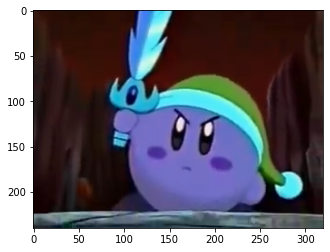

In [ ]:
plt.imshow(images[100])
plt.show()

In [ ]:
for i,image in enumerate(images):
    b,g,r = cv2.split(image)
    images[i] = cv2.merge([r,g,b])           

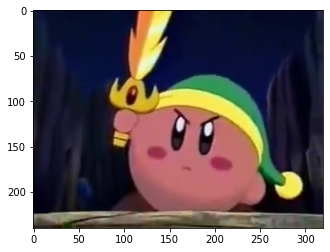

In [ ]:
plt.imshow(images[100])
plt.show()

#HITO 2

###Diferencia de Pixeles

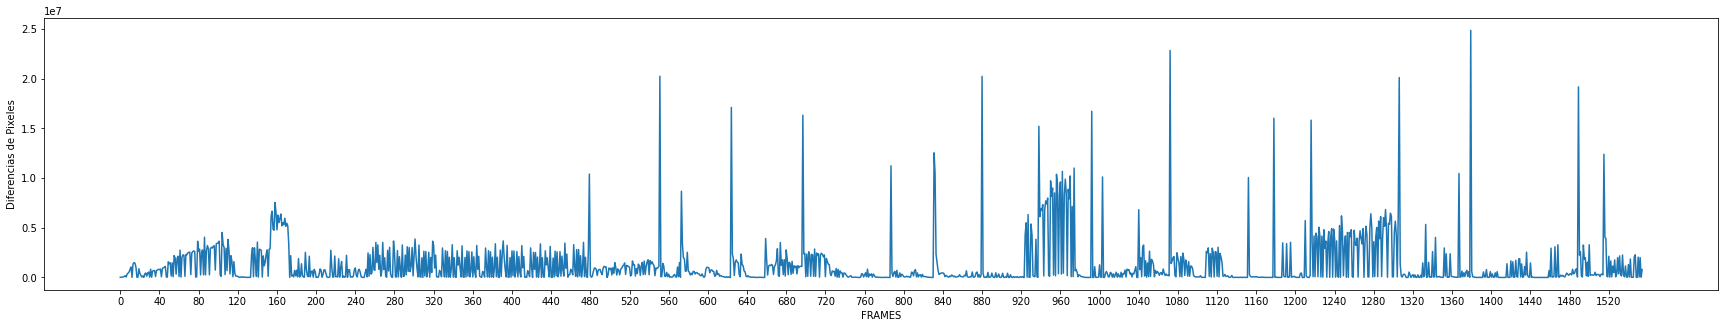

In [ ]:
diferencias = []
for i  in range(1,len(images)):
    diff = np.sum(cv2.subtract(images[i-1],images[i]) ** 2)
    diferencias.append(diff)
plt.figure(figsize=(30,5))
plt.plot(range(len(images)-1),diferencias)
plt.ylabel('Diferencias de Pixeles')
plt.xlabel('FRAMES')
plt.xticks(np.arange(0, len(images), 40.0))
plt.show()

Revisión de picos altos debido a que existe mayor diferencia entre escenas

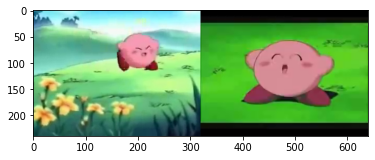

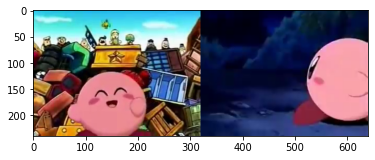

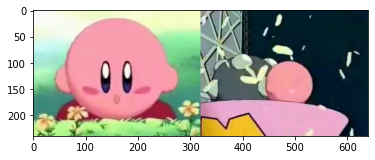

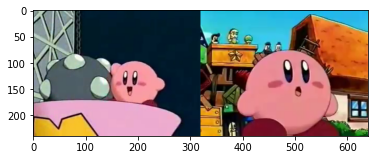

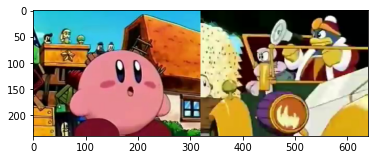

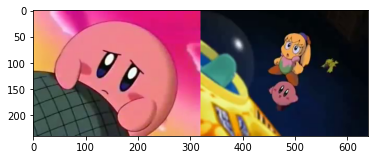

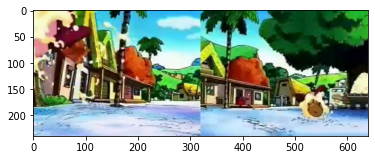

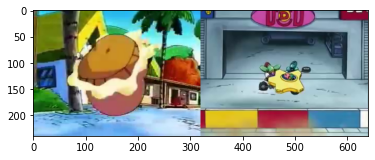

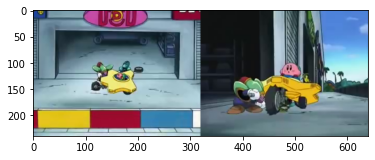

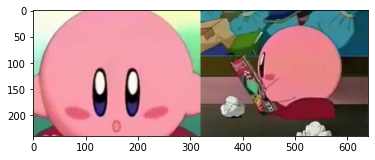

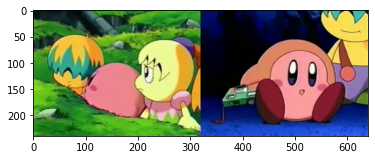

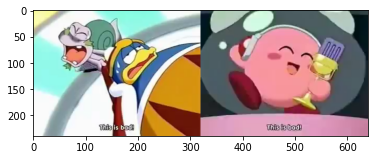

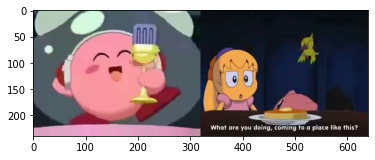

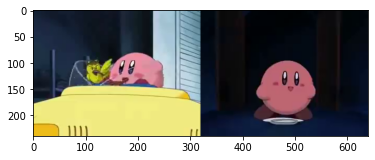

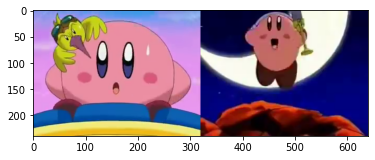

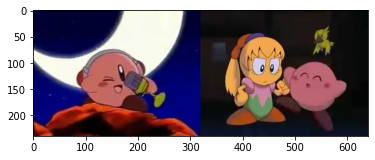

Se detectaron 16 cambios de imagen


In [ ]:
ima = 0
for i, value in enumerate(diferencias):
    if value > 1.07e7:
        imas = np.hstack((images[i],images[i+1]))
        plt.imshow(imas)
        plt.show()
        ima += 1
print(f"Se detectaron {ima} cambios de imagen")

###Diferencia de Histograma

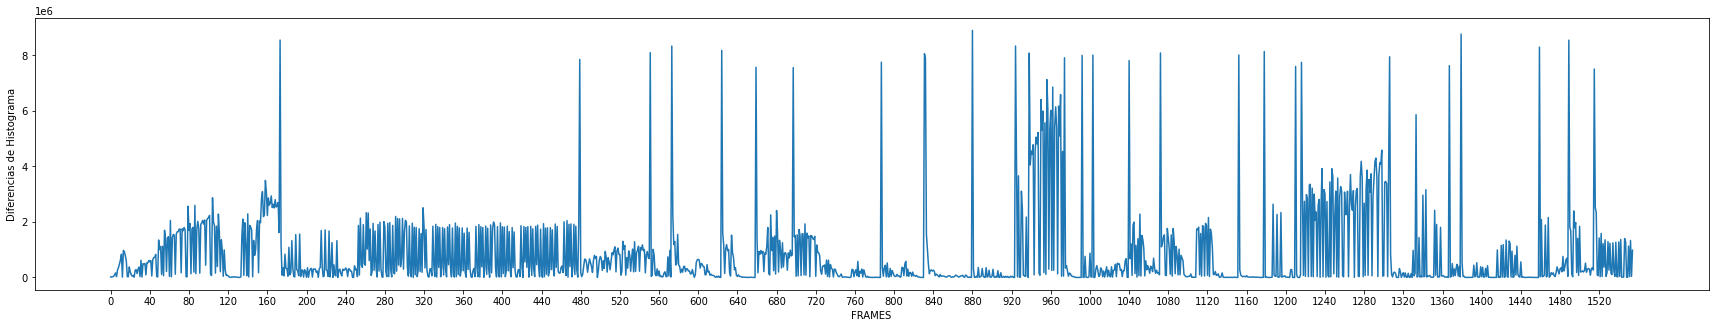

In [ ]:
diferenciasH = []
for i  in range(1,len(images)):
    diff = np.sum((images[i-1][:,:,0].ravel()-images[i][:,:,0].ravel())**2) 
    diferenciasH.append(diff)
plt.figure(figsize=(30,5))
plt.plot(range(len(images)-1),diferenciasH)
plt.ylabel('Diferencias de Histograma')
plt.xlabel('FRAMES')
plt.xticks(np.arange(0, len(images), 40.0))
plt.show()

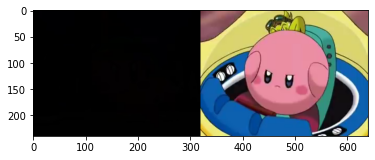

173


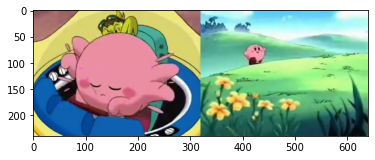

479


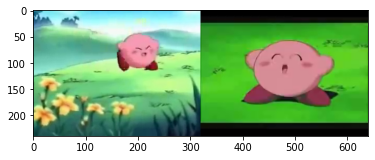

551


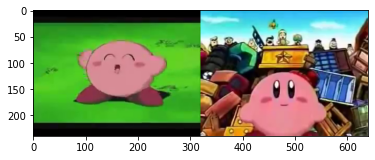

573


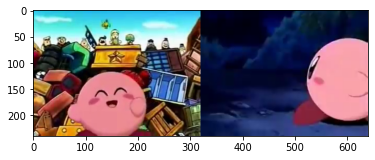

624


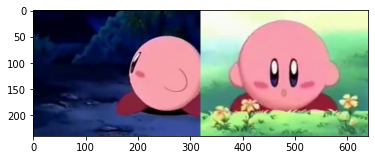

659


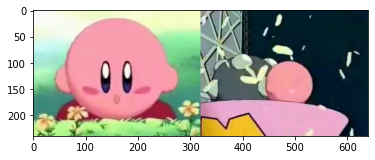

697


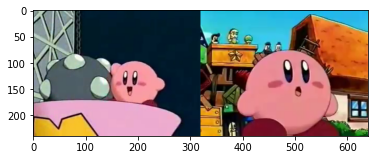

787


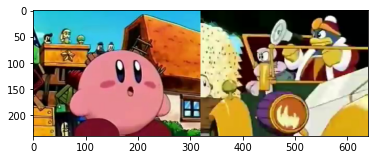

831


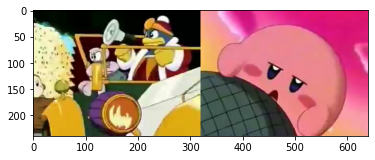

832


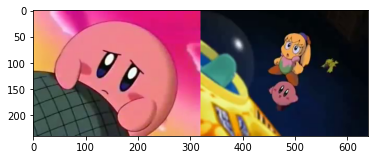

880


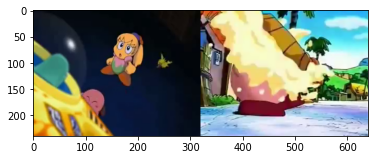

924


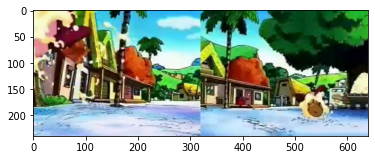

938


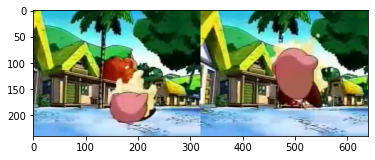

956


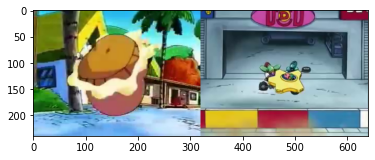

974


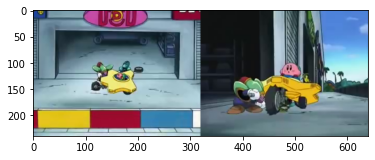

992


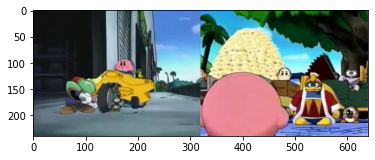

1003


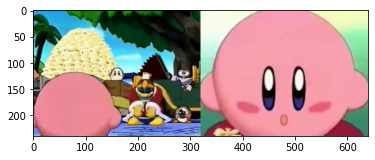

1040


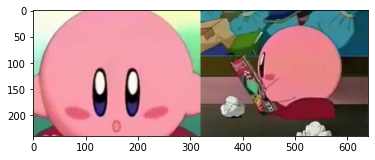

1072


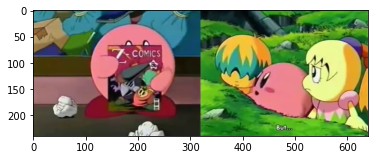

1152


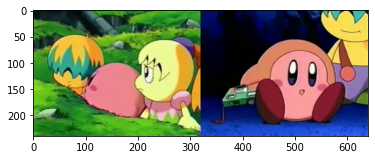

1178


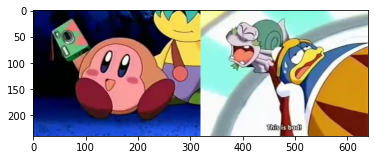

1210


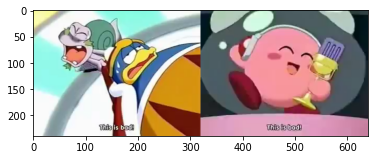

1216


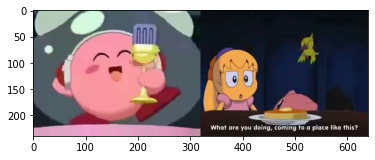

1306


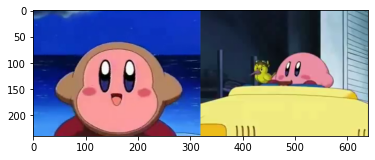

1367


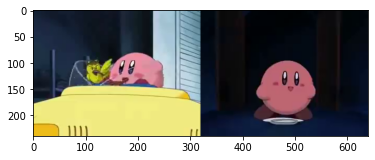

1379


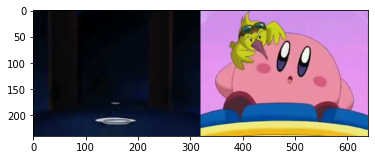

1459


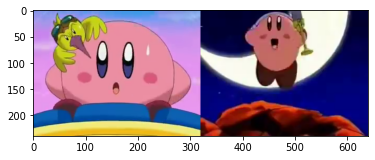

1489


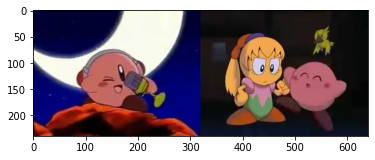

1515
Se detectaron 29 cambios de imagen


In [ ]:
ima = 0
for i, value in enumerate(diferenciasH):
    if value > 7.0e6:
        imas = np.hstack((images[i],images[i+1]))
        plt.imshow(imas)
        plt.show()
        print(i)
        ima += 1
print(f"Se detectaron {ima} cambios de imagen")

###Diferencia CNN

* 1: Se detectó un cambio de Escena
* 0: No se detectó cambio de Escena

In [ ]:
x_train = []
y_train = []
for i, value in enumerate(diferenciasH):
    x_train.append([images[i],images[i+1]])
    if value > 7.0e6:
        y_train.append(1)
    else:
        y_train.append(0)

In [ ]:
x_test = []
y_test = []
for i, value in enumerate(diferenciasH):
    if value > 1.07e7:
        x_test.append([images[i],images[i+1]])
        y_test.append(1)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
num_classes = 2

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import pandas as pd  
import time as t
model = VGG16(weights='imagenet', include_top=False)
tiempo = t.time()
vgg16_feature = model.predict(images)#[470:720])
print("Se ha tardado",t.time()-tiempo)
print(vgg16_feature.shape)

Se ha tardado 1194.9580698013306
(1556, 7, 10, 512)


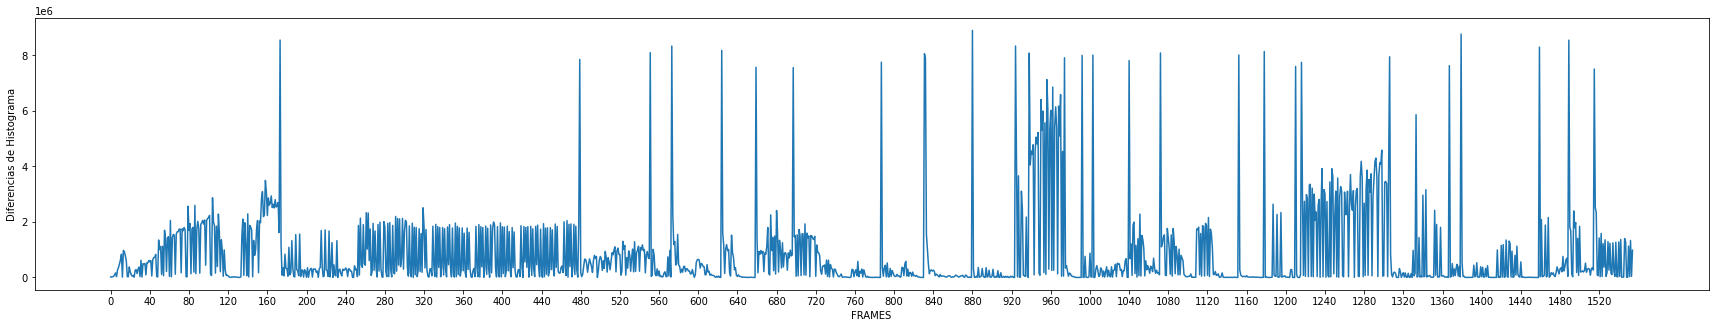

In [ ]:
diferenciasR = []
for i in range(1,len(images)):
    diff = np.sum((vgg16_feature[i-1]-vgg16_feature[i])**2)
    diferenciasR.append(diff)
plt.figure(figsize=(30,5))
plt.plot(range(len(images)-1),diferenciasH)
plt.ylabel('Diferencias de Features')
plt.xlabel('FRAMES')
plt.xticks(np.arange(0, len(images), 40.0))
plt.show()

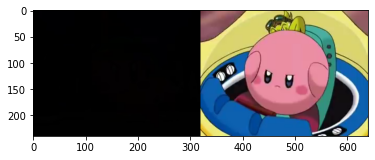

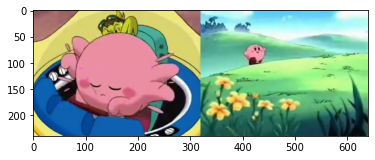

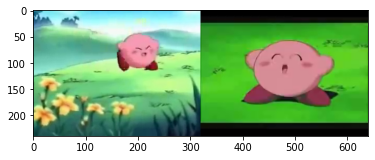

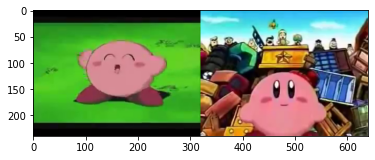

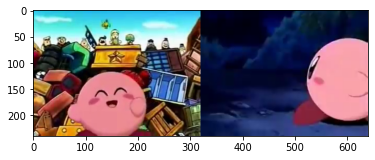

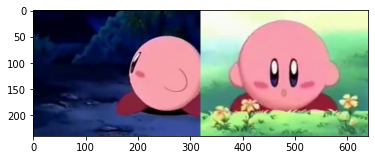

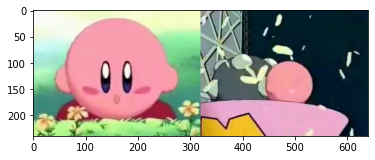

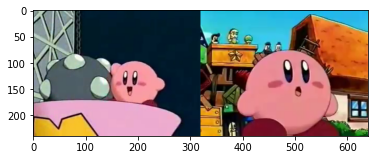

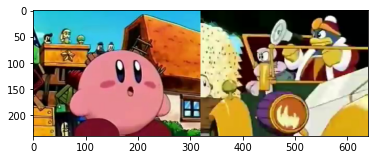

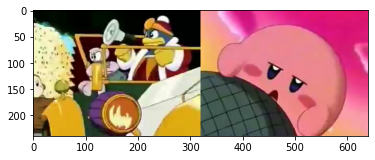

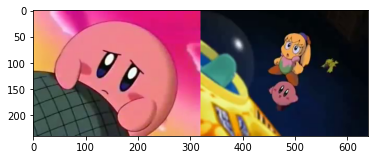

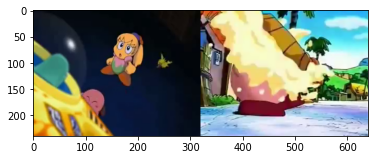

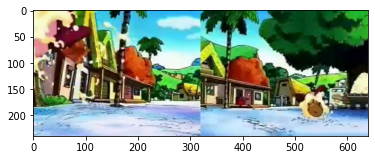

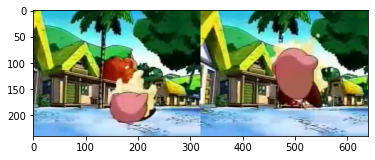

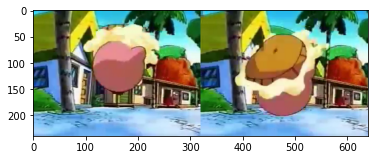

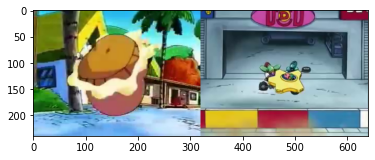

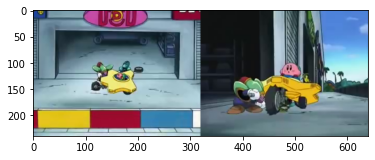

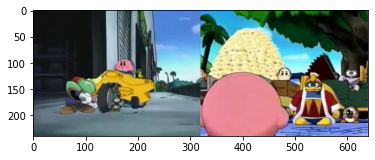

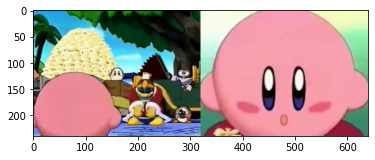

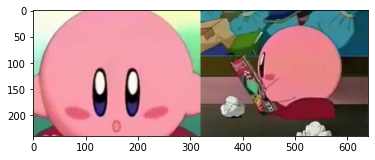

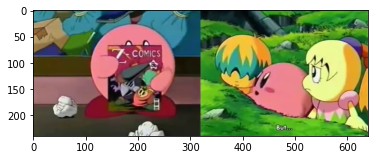

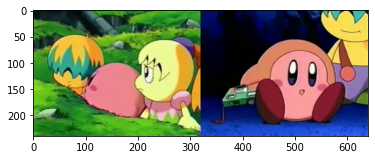

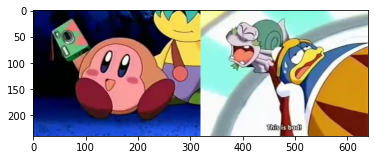

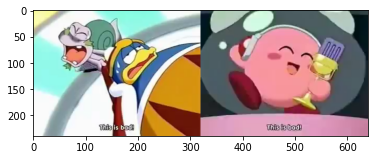

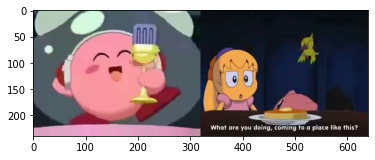

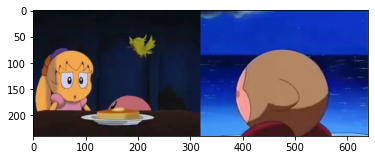

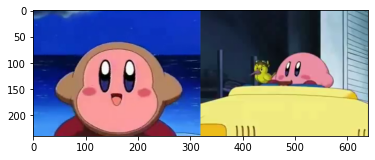

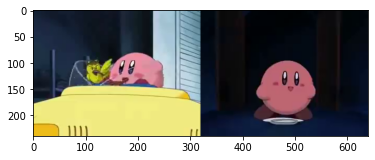

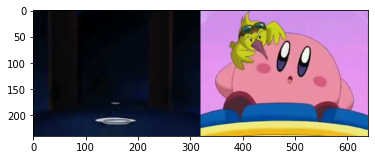

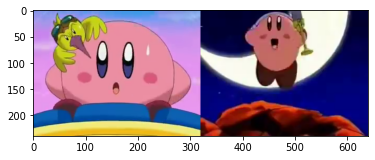

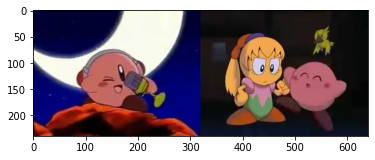

Se detectaron 31 cambios de imagen


In [ ]:
result_screen_changes = []
for i, value in enumerate(diferenciasR):
    if value > 4e6:
        imas = np.hstack((images[i],images[i+1]))
        plt.imshow(imas)
        plt.show()
        result_screen_changes.append(i)
print(f"Se detectaron {len(result_screen_changes)} cambios de imagen")

#HITO 3 - CREACIÓN DE GIF CON LOS RESULTADOS

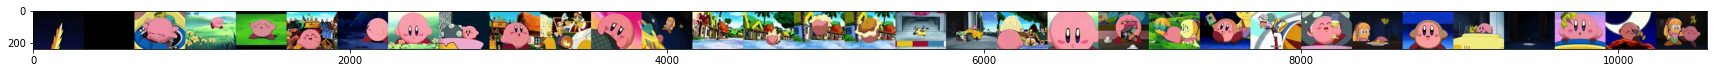

In [ ]:
imas = images[0]
for v in result_screen_changes:
    imas = np.hstack((imas,images[v]))
imas = np.hstack((imas,images[result_screen_changes[-1]+1]))
plt.figure(figsize=(30,5))
plt.imshow(imas)
plt.show()

In [ ]:
import imageio
gif = []
gif.append(images[0])
for v in result_screen_changes:
    gif.append(images[v])
gif.append(images[result_screen_changes[-1]+1])

imageio.mimsave('poyo.gif', gif)

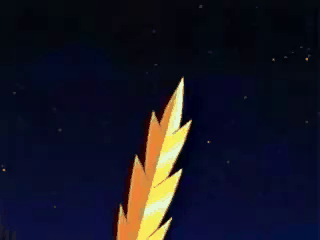

In [ ]:
from IPython.display import Image
Image('poyo.gif', format='png')